## <b> Projeto Final

### Proposta: </b> Analise e  Identificação de padrões socioeconomicos e saúde,  dos municipios brasileiros no tratamento de  pacientes com cancer de mama. 
### Método: Agrupamento -  Clustering 

### Disciplina : IBI5031 - Aprendizagem de Máquina para Bioinformática

### Etapa 1 : Preparação dos dados

In [1]:
# Docente: Marcelo da Silva Reis
# Programa: Pós - Graduação Interunidades em Bioinformática da USP
# Alunos: Bruna Ferreira dos Santos e Guilherme

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [3]:
def to_lower (df):
    # Removendo espaços em branco das palavras
    df['municipio'] = df['municipio'].str.strip()
     # transformar em minusculo
    df['municipio'] = df['municipio'].str.lower()
   
    return df 

In [4]:
def le_base (base):
    caminho = '/content/drive/MyDrive/4. Mestrado/3_Material de Aula/IBI5031_202002_IME_Aprendizado_Maquina/Projeto/Code/data/dados_entrada/'
    df = pd.read_excel(caminho+base+".xlsx")
    df = to_lower (df)
    print(df.head())
    print(df.shape)
    return df

In [5]:
caminho = '/content/drive/MyDrive/4. Mestrado/3_Material de Aula/IBI5031_202002_IME_Aprendizado_Maquina/Projeto/Code/data/dados_entrada/'
saida = '/content/drive/MyDrive/4. Mestrado/3_Material de Aula/IBI5031_202002_IME_Aprendizado_Maquina/Projeto/Code/data/dados_saida/'

## <b>0. Descrição e import das bases a serem utilizadas</b>

### <b> 0.1 Base IBGE - Visão por municipios Brasileiros </b>
### <b>População - 2020 </b>

* Fonte: IBGE - Estimativas de População
* Disponível em:  <a href = "https://sidra.ibge.gov.br/tabela/6579"> Sidra - Tabela 6579 </a>

* Informações disponíveis: 
    - Municipio 
    - UF - unidade da federação
    - população estimada em 2020

In [6]:
df0 = pd.read_excel(caminho+"df0_IBGE_Tabela_6579.xlsx")

In [7]:
df0 = to_lower (df0)
df0['uf'] = df0['uf'].str.lower()

In [8]:
#Tipos de dados
df0.dtypes

municipio    object
uf           object
populacao     int64
dtype: object

In [9]:
df0.head()

,municipio,uf,populacao
0,alta floresta d'oeste,ro,22728
1,ariquemes,ro,109523
2,cabixi,ro,5188
3,cacoal,ro,85893
4,cerejeiras,ro,16204


In [10]:
df0.shape

(5570, 3)

Text(0, 0.5, 'População Estimada')

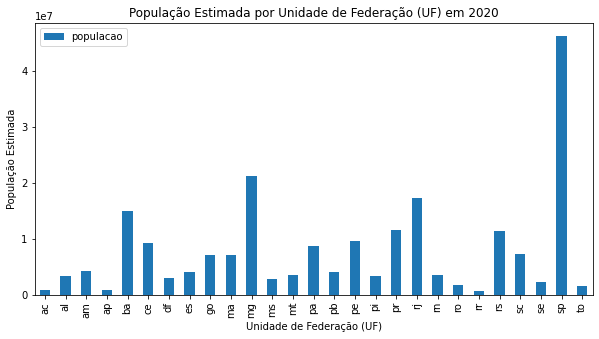

In [11]:
## Grafico dos estados com maior população
df0.groupby(['uf']).sum().plot.bar(figsize=(10, 5))
#  Nomes dos eixos
plt.title('População Estimada por Unidade de Federação (UF) em 2020')
plt.xlabel('Unidade de Federação (UF)')
plt.ylabel('População Estimada')

### <b> Produto Interno Bruto(PIB) dos Municipios </b>

* Fonte: IBGE - Produto Interno Bruto(PIB)
* Disponível em:  <a href = "https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas"> Sidra - Tabela 5938 </a>

* Informações disponíveis: 
    - Municipio 
    - UF - unidade da federação
    - Produto Interno Bruto(PIB) em 2018

In [12]:
df1 = pd.read_excel(caminho+"df1_IBGE_Tabela_5938.xlsx")

In [13]:
df1['uf'] = df1['uf'].str.lower()
df1.head()

,municipio,uf,pib
0,Alta Floresta D'Oeste,ro,499306
1,Ariquemes,ro,2463773
2,Cabixi,ro,140502
3,Cacoal,ro,2180454
4,Cerejeiras,ro,472179


In [14]:
df1 = to_lower (df1)

Text(0, 0.5, 'Produto Interno Bruto (PIB)')

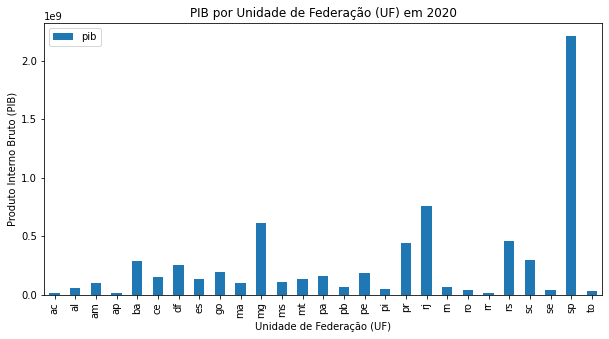

In [15]:
## Grafico dos estados com maior população
df1.groupby(['uf']).sum().plot.bar(figsize=(10, 5))
#  Nomes dos eixos
plt.title('PIB por Unidade de Federação (UF) em 2020')
plt.xlabel('Unidade de Federação (UF)')
plt.ylabel('Produto Interno Bruto (PIB)')

In [16]:
#União de base de pib com a base final 
df = pd.merge(df0, df1, how="left", on=["uf", "municipio"])
df.head()

,municipio,uf,populacao,pib
0,alta floresta d'oeste,ro,22728,499306.0
1,ariquemes,ro,109523,2463773.0
2,cabixi,ro,5188,140502.0
3,cacoal,ro,85893,2180454.0
4,cerejeiras,ro,16204,472179.0


In [17]:
df.shape

(5570, 4)

In [18]:
df.isnull().sum()

municipio    0
uf           0
populacao    0
pib          3
dtype: int64

In [19]:
## Substituir valor ausente por zero
df['pib'].fillna(0, inplace=True)

In [20]:
df.isnull().sum()

municipio    0
uf           0
populacao    0
pib          0
dtype: int64

### <b> 0.2 Base Atlas - Visão por municipios Brasileiros </b>

### <b> IDHM (Índice de Desenvolvimento Humano Municipal) </b>

* Fonte: Atlas - Índice de Desenvolvimento Humano Municipal (IDHM)
* Disponível em:  <a href = "http://www.atlasbrasil.org.br/ranking"> IDHM 2010 </a>

* Informações disponíveis: 
    - Municipio
    - UF - unidade da federação
    - IDHM
    - IDHM Renda
    - IDHM Educação
    - IDHM Longevidade

* Detalhes sobre IDH : <a href = "https://www.br.undp.org/content/brazil/pt/home/idh0/conceitos/o-que-e-o-idhm.html#:~:text=O%20%C3%ADndice%20varia%20de%200,%C3%A0%20disponibilidade%20de%20indicadores%20nacionais."> link </a>

In [21]:
df2 = pd.read_excel(caminho+"df2_Atlas_Idhm.xlsx")
df2['uf'] = df2['uf'].str.lower()
df2 = to_lower (df2)
df2.head()

,municipio,uf,idh,idhm_renda,idhm_educa,idhm_longev
0,são caetano do sul,sp,0.862,0.887,0.811,0.891
1,águas de são pedro,sp,0.854,0.890,0.825,0.849
2,florianópolis,sc,0.847,0.873,0.800,0.870
3,balneário camboriú,sc,0.845,0.894,0.789,0.854
4,vitória,es,0.845,0.855,0.805,0.876


Text(0, 0.5, 'Valor de IDH')

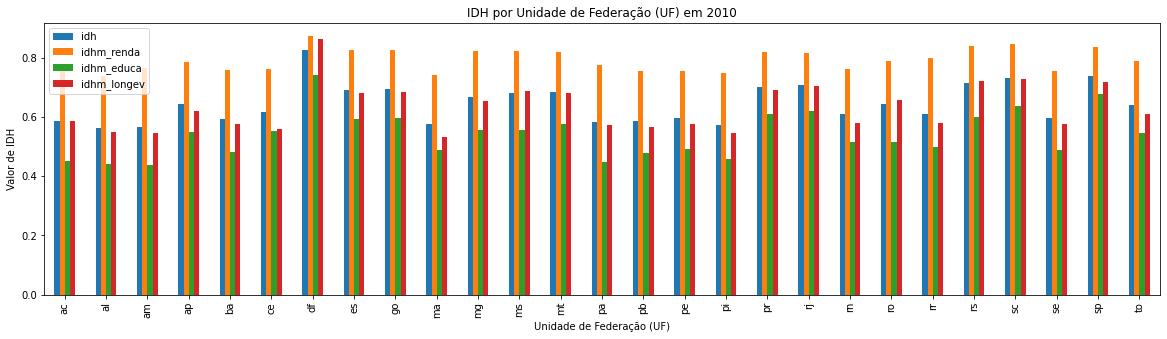

In [22]:
## Grafico dos estados com maior população
df2[['idh','idhm_renda','idhm_educa','idhm_longev','uf']].groupby(['uf']).mean().plot.bar(figsize=(20, 5))
#  Nomes dos eixos
plt.title('IDH por Unidade de Federação (UF) em 2010')
plt.xlabel('Unidade de Federação (UF)')
plt.ylabel('Valor de IDH')

In [23]:
#União de base de pib com a base final 
df = pd.merge(df, df2, how="left", on=["uf", "municipio"])
df.head()

,municipio,uf,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev
0,alta floresta d'oeste,ro,22728,499306.0,0.641,0.763,0.526,0.657
1,ariquemes,ro,109523,2463773.0,0.702,0.806,0.600,0.716
2,cabixi,ro,5188,140502.0,0.650,0.757,0.559,0.650
3,cacoal,ro,85893,2180454.0,0.718,0.821,0.620,0.727
4,cerejeiras,ro,16204,472179.0,0.692,0.799,0.602,0.688


In [24]:
df.isnull().sum()

municipio       0
uf              0
populacao       0
pib             0
idh            35
idhm_renda     35
idhm_educa     35
idhm_longev    35
dtype: int64

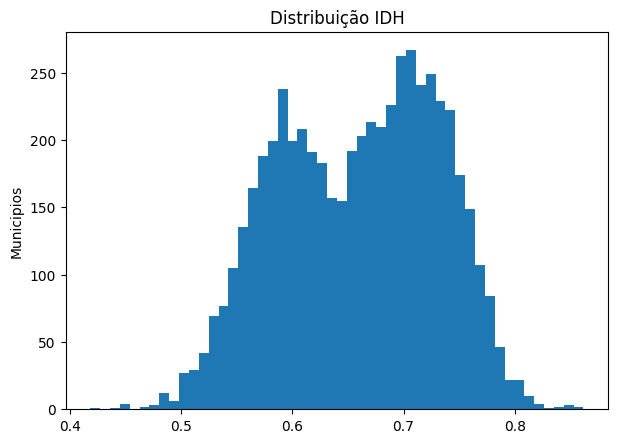

In [25]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = df['idh']
plt.hist(x, bins=50)
plt.gca().set(title='Distribuição IDH', ylabel='Municipios');

In [26]:
# Por ser uma distribuição semelhante a distribuição normal é possivel substituir valores ausentes pela média ou mediana
df['idh'].fillna((df['idh'].mean()), inplace=True)
df['idhm_renda'].fillna((df['idhm_renda'].mean()), inplace=True)
df['idhm_educa'].fillna((df['idhm_educa'].mean()), inplace=True)
df['idhm_longev'].fillna((df['idhm_longev'].mean()), inplace=True)

In [27]:
df.isnull().sum()

municipio      0
uf             0
populacao      0
pib            0
idh            0
idhm_renda     0
idhm_educa     0
idhm_longev    0
dtype: int64

### <b> Códigos dos municipios brasileiros segundo IBGE </b>

* Informações disponíveis: 
    - Municipio
    - UF - unidade da federação
    - cod_mun = código do municipio de acordo com IBGE 

Referência : <a href = "https://www.ibge.gov.br/explica/codigos-dos-municipios.php"> link </a>


In [28]:
df_0 = le_base ("df0_depara_codIBGE_municipios")

                 municipio  uf  cod_mun
0    alta floresta d'oeste  ro   110001
1  alto alegre dos parecis  ro   110037
2             alto paraíso  ro   110040
3         alvorada d'oeste  ro   110034
4                ariquemes  ro   110002
(5570, 3)


In [29]:
#União de base de pib com a base final 
df = pd.merge(df, df_0, how="left", on=["uf", "municipio"])
df.head()

,municipio,uf,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev,cod_mun
0,alta floresta d'oeste,ro,22728,499306.0,0.641,0.763,0.526,0.657,110001
1,ariquemes,ro,109523,2463773.0,0.702,0.806,0.600,0.716,110002
2,cabixi,ro,5188,140502.0,0.650,0.757,0.559,0.650,110003
3,cacoal,ro,85893,2180454.0,0.718,0.821,0.620,0.727,110004
4,cerejeiras,ro,16204,472179.0,0.692,0.799,0.602,0.688,110005


In [30]:
df.shape

(5570, 9)

In [31]:
#Verificando valores ausentes 
df.isnull().sum()

municipio      0
uf             0
populacao      0
pib            0
idh            0
idhm_renda     0
idhm_educa     0
idhm_longev    0
cod_mun        0
dtype: int64

### <b> 0.3 DATASUS - Sistema de Dados abertos do Ministério da Saúde  </b>
### <b> 0.3.1 Assistência á Saúde </b>

#### <b> Produção Hospitalar - Sistema de Informações Hospitalares do SUS (SIH - SUS)</b>
* Disponível em: <a href = "http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633"> (SIH - SUS) 2018 </a>

* Informações disponíveis: 
    - cod_mun: codigo do municipio segundo IBGE
    - municipio: nome do municipio de atendimento
    - eletivo_qtd_inter: quantidade de internações para procedimentos eletivos 
    - urgencia_qtd_inter: quantidade de internações para procedimentos de urgência

In [32]:
df3 = le_base ("df3_atend_qtd_internacoes_2018")

   cod_mun                municipio  ...  urgencia_qtd_inter  outros_qtd_inter
0   110001    alta floresta d'oeste  ...              1952.0                 0
1   110037  alto alegre dos parecis  ...               407.0                 0
2   110040             alto paraíso  ...               476.0                 0
3   110034         alvorada d'oeste  ...               712.0                 0
4   110002                ariquemes  ...              5549.0                 0

[5 rows x 5 columns]
(3147, 5)


* Informações disponíveis: 
    - cod_mun: codigo do municipio segundo IBGE
    - municipio: nome do municipio de atendimento
    - efetivo_valor_inter: valor médio de internação para procedimentos eletivos 
    - urgencia_valor_inter: valor médio de internações para procedimentos de urgência.
    - outros_valor_inter: valor médio de internações para outros procedimentos

In [33]:
df4 = le_base ("df4_atend_valor_internacoes_2018")

   cod_mun                municipio  ...  urgencia_valor_inter  outros_valor_inter
0   110001    alta floresta d'oeste  ...                309.03                 0.0
1   110037  alto alegre dos parecis  ...                300.94                 0.0
2   110040             alto paraíso  ...                245.93                 0.0
3   110034         alvorada d'oeste  ...                286.14                 0.0
4   110002                ariquemes  ...                743.14                 0.0

[5 rows x 5 columns]
(3148, 5)


In [34]:
#Join das tabelas
df4 = pd.merge(df3, df4, how="inner", on=["cod_mun", "municipio"])

In [35]:
df4.head()

,cod_mun,municipio,eletivo_qtd_inter,urgencia_qtd_inter,outros_qtd_inter,efetivo_valor_inter,urgencia_valor_inter,outros_valor_inter
0,110001,alta floresta d'oeste,94.0,1952.0,0,536.70,309.03,0.0
1,110037,alto alegre dos parecis,NaN,407.0,0,0.00,300.94,0.0
2,110040,alto paraíso,1.0,476.0,0,204.50,245.93,0.0
3,110034,alvorada d'oeste,15.0,712.0,0,464.73,286.14,0.0
4,110002,ariquemes,217.0,5549.0,0,1010.18,743.14,0.0


In [36]:
df4.columns 

Index(['cod_mun', 'municipio', 'eletivo_qtd_inter', 'urgencia_qtd_inter',
       'outros_qtd_inter', 'efetivo_valor_inter', 'urgencia_valor_inter',
       'outros_valor_inter'],
      dtype='object')

In [37]:
df4 = df4[['cod_mun', 'eletivo_qtd_inter', 'urgencia_qtd_inter',
       'outros_qtd_inter', 'efetivo_valor_inter', 'urgencia_valor_inter',
       'outros_valor_inter']]

In [38]:
#União de base de pib com a base final 
df = pd.merge(df, df4, how="left", on=["cod_mun"])
df.head()

,municipio,uf,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev,cod_mun,eletivo_qtd_inter,urgencia_qtd_inter,outros_qtd_inter,efetivo_valor_inter,urgencia_valor_inter,outros_valor_inter
0,alta floresta d'oeste,ro,22728,499306.0,0.641,0.763,0.526,0.657,110001,94.0,1952.0,0.0,536.70,309.03,0.0
1,ariquemes,ro,109523,2463773.0,0.702,0.806,0.600,0.716,110002,217.0,5549.0,0.0,1010.18,743.14,0.0
2,cabixi,ro,5188,140502.0,0.650,0.757,0.559,0.650,110003,266.0,NaN,0.0,303.11,0.00,0.0
3,cacoal,ro,85893,2180454.0,0.718,0.821,0.620,0.727,110004,10573.0,2998.0,0.0,943.75,422.97,0.0
4,cerejeiras,ro,16204,472179.0,0.692,0.799,0.602,0.688,110005,2.0,1198.0,0.0,542.80,383.23,0.0


In [39]:
df.shape

(5570, 15)

In [40]:
ausente = df.isnull().sum()
ausente[ausente>0]

eletivo_qtd_inter       3506
urgencia_qtd_inter      2505
outros_qtd_inter        2438
efetivo_valor_inter     2438
urgencia_valor_inter    2438
outros_valor_inter      2438
dtype: int64

In [41]:
## Substituir valor ausente por zero
df.fillna(0, inplace=True)

In [42]:
ausente = df.isnull().sum()
ausente[ausente>0]

Series([], dtype: int64)

#### <b> SISCAN - MAMOGRAFIA - POR LOCAL DE ATENDIMENTO - BRASIL  </b>
* Disponível em: <a href = "http://tabnet.datasus.gov.br/cgi/dhdat.exe?siscan/mamografia_atendbr.def"> (DATASUS) </a>



* Informações disponíveis: 
    - cod_mun: codigo do municipio segundo IBGE
    - municipio: nome do municipio de atendimento
    - risco_sim
    - risco_nao
    - risco_indef
    - risco_ignorado

In [43]:
df5 = le_base("df5_mamografia_atend_risco_2018")

   cod_mun        municipio  risco_sim  risco_nao  risco_indef  risco_ignorado
0   110011             jaru         46        221           66               0
1   110012        ji-parana        288       2250          148               1
2   110020      porto velho        488       2907           58               2
3   110110  itapua do oeste          0          1            0               0
4   120001       acrelandia         14         45           13               2
(4503, 6)


In [44]:
df6 = le_base("df6_mamografia_atend_exame_clinic_ant_2018")

   cod_mun        municipio  ...  exam_anterior_nao  exam_anterior_ig
0   110011             jaru  ...                108                32
1   110012        ji-parana  ...                868              1815
2   110020      porto velho  ...               1291              1026
3   110110  itapua do oeste  ...                  0                 0
4   120001       acrelandia  ...                 11                13

[5 rows x 5 columns]
(4503, 5)


In [45]:
df6.columns

Index(['cod_mun', 'municipio', 'exam_anterior_sim', 'exam_anterior_nao',
       'exam_anterior_ig'],
      dtype='object')

In [46]:
df7 = le_base("df7_mamografia_atend_faixaetaria_2018")

   cod_mun        municipio  ...  idade_maior_55  idade_ig
0   110011             jaru  ...             213         0
1   110012        ji-parana  ...             987         0
2   110020      porto velho  ...            1155         0
3   110110  itapua do oeste  ...               1         0
4   120001       acrelandia  ...              33         0

[5 rows x 7 columns]
(4503, 7)


In [47]:
df7.columns

Index(['cod_mun', 'municipio', 'idade_menor_20', 'idade_20_40', 'idade_41_54',
       'idade_maior_55', 'idade_ig'],
      dtype='object')

In [48]:
df8 =le_base("df8_mamografia_atend_nodulo_requis_2018")

   cod_mun        municipio  ...  nod_2_mamas  nod_nao
0   110011             jaru  ...            7      287
1   110012        ji-parana  ...           66     2421
2   110020      porto velho  ...           46     3237
3   110110  itapua do oeste  ...            0        1
4   120001       acrelandia  ...            2       58

[5 rows x 6 columns]
(4503, 6)


In [49]:
df8.columns

Index(['cod_mun', 'municipio', 'nod_mama_dir_sim', 'nod_mama_dir_esq',
       'nod_2_mamas', 'nod_nao'],
      dtype='object')

In [50]:
df9 = le_base("df9_mamografia_atend_tam_nodulo_2018")

   cod_mun        municipio  ...  nod_tam_maior_50  nod_tam_ig
0   110011             jaru  ...                 0         319
1   110012        ji-parana  ...                 0        2547
2   110020      porto velho  ...                 0        3123
3   110110  itapua do oeste  ...                 0           1
4   120001       acrelandia  ...                 0          72

[5 rows x 7 columns]
(4503, 7)


In [51]:
df9.columns

Index(['cod_mun', 'municipio', 'nod_tam_menor_10', 'nod_tam_11_20',
       'nod_tam_21_50', 'nod_tam_maior_50', 'nod_tam_ig'],
      dtype='object')

In [52]:
df10 = le_base("df10_mamografia_atend_mamog_anterior_2018")

   cod_mun        municipio  mamog_ante_sim  mamog_ante_sim.1  mamog_ante_desc
0   110011             jaru             208                93               32
1   110012        ji-parana            1545               953              189
2   110020      porto velho            1939              1406              110
3   110110  itapua do oeste               0                 0                1
4   120001       acrelandia              49                19                6
(4503, 5)


In [53]:
df10.columns

Index(['cod_mun', 'municipio', 'mamog_ante_sim', 'mamog_ante_sim.1',
       'mamog_ante_desc'],
      dtype='object')

In [54]:
df11 = le_base("df11_mamografia_atend_Ind_clinica_2018")

   cod_mun        municipio  ind_clin_mamog_diag  ind_clin_mamog_rast     
0   110011             jaru                    0                  333  NaN
1   110012        ji-parana                   49                 2638  NaN
2   110020      porto velho                  133                 3322  NaN
3   110110  itapua do oeste                    0                    1  NaN
4   120001       acrelandia                    1                   73  NaN
(4503, 5)


In [55]:
df11.columns

Index(['cod_mun', 'municipio', 'ind_clin_mamog_diag', 'ind_clin_mamog_rast',
       '   '],
      dtype='object')

In [56]:
df12 = le_base("df12_mamografia_atend_tipo_mama_esq_2018")

   cod_mun        municipio  ...  mama_esq_reconst  mama_esq_ig
0   110011             jaru  ...                 0            0
1   110012        ji-parana  ...                 0            0
2   110020      porto velho  ...                 0           40
3   110110  itapua do oeste  ...                 0            0
4   120001       acrelandia  ...                 0            0

[5 rows x 9 columns]
(4503, 9)


In [57]:
df12.columns

Index(['cod_mun', 'municipio', 'mama_esq_densa', 'mama_esq_adiposa',
       'mama_esq_predom_densa', 'mama_esq_predom_adiposa',
       'mama_esq_parenquima', 'mama_esq_reconst', 'mama_esq_ig'],
      dtype='object')

In [58]:
df13 = le_base("df13_mamografia_atend_tipo_mama_dir_2018")

   cod_mun        municipio  ...  mama_dir_ig   Total
0   110011             jaru  ...            0     333
1   110012        ji-parana  ...            1    2687
2   110020      porto velho  ...           34    3455
3   110110  itapua do oeste  ...            0       1
4   120001       acrelandia  ...            0      74

[5 rows x 10 columns]
(4503, 10)


In [59]:
df13.columns

Index(['cod_mun', 'municipio', 'mama_dir_densa', 'mama_dir_adiposa',
       'mama_dir_predom_densa', 'mama_dir_predom_adiposa',
       'mama_dir_parenquima', 'mama_dir_reconst', 'mama_dir_ig', ' Total'],
      dtype='object')

In [60]:
df14 = le_base("df14_mamografia_atend_tipo_mamo_rast_2018")

   cod_mun        municipio  tratado_cancer_antes
0   110011             jaru                     0
1   110012        ji-parana                     0
2   110020      porto velho                     5
3   110110  itapua do oeste                     0
4   120001       acrelandia                     1
(4503, 3)


In [61]:
df14.columns

Index(['cod_mun', 'municipio', 'tratado_cancer_antes'], dtype='object')

In [62]:
df15= le_base("df15_mamografia_atend_linf_dir")

   cod_mun        municipio  ...  linf_dir_n_visu  linf_dir_ig
0   110011             jaru  ...               31            0
1   110012        ji-parana  ...             1836            1
2   110020      porto velho  ...             1837           34
3   110110  itapua do oeste  ...                1            0
4   120001       acrelandia  ...               16            0

[5 rows x 6 columns]
(4503, 6)


In [63]:
df15.columns

Index(['cod_mun', 'municipio', 'linf_dir_normal', 'linf_dir_alter',
       'linf_dir_n_visu', 'linf_dir_ig'],
      dtype='object')

In [64]:
df16= le_base("df16_mamografia_atend_linf_esq")

   cod_mun        municipio  ...  linf_esq_n_visu  linf_esq_ig
0   110011             jaru  ...               31            0
1   110012        ji-parana  ...             1740            0
2   110020      porto velho  ...             1914           40
3   110110  itapua do oeste  ...                1            0
4   120001       acrelandia  ...               17            0

[5 rows x 6 columns]
(4503, 6)


In [65]:
df16.columns

Index(['cod_mun', 'municipio', 'linf_esq_normal', 'linf_esq_alter',
       'linf_esq_n_visu', 'linf_esq_ig'],
      dtype='object')

In [66]:
#União de base de mamografia com a base final 
mamografia = pd.merge(df_0, df5, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df6, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df7, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df8, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df9, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df10, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df11, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df12, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df13, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df14, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df15, how="left", on=["cod_mun"])
mamografia = pd.merge(mamografia, df16, how="left", on=["cod_mun"])
mamografia.head(10)

,municipio_x,uf,cod_mun,municipio_y,risco_sim,risco_nao,risco_indef,risco_ignorado,municipio_x,exam_anterior_sim,exam_anterior_nao,exam_anterior_ig,municipio_y,idade_menor_20,idade_20_40,idade_41_54,idade_maior_55,idade_ig,municipio_x,nod_mama_dir_sim,nod_mama_dir_esq,nod_2_mamas,nod_nao,municipio_y,nod_tam_menor_10,nod_tam_11_20,nod_tam_21_50,nod_tam_maior_50,nod_tam_ig,municipio_x,mamog_ante_sim,mamog_ante_sim.1,mamog_ante_desc,municipio_y,ind_clin_mamog_diag,ind_clin_mamog_rast,,municipio_x,mama_esq_densa,mama_esq_adiposa,mama_esq_predom_densa,mama_esq_predom_adiposa,mama_esq_parenquima,mama_esq_reconst,mama_esq_ig,municipio_y,mama_dir_densa,mama_dir_adiposa,mama_dir_predom_densa,mama_dir_predom_adiposa,mama_dir_parenquima,mama_dir_reconst,mama_dir_ig,Total,municipio_x,tratado_cancer_antes,municipio_y,linf_dir_normal,linf_dir_alter,linf_dir_n_visu,linf_dir_ig,municipio,linf_esq_normal,linf_esq_alter,linf_esq_n_visu,linf_esq_ig
0,alta floresta d'oeste,ro,110001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,alto alegre dos parecis,ro,110037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,alto paraíso,ro,110040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,alvorada d'oeste,ro,110034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ariquemes,ro,110002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,buritis,ro,110045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,cabixi,ro,110003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,cacaulândia,ro,110060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,cacoal,ro,110004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,campo novo de rondônia,ro,110070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
mamografia.shape

(5570, 66)

In [68]:
mamografia.columns

Index(['municipio_x', 'uf', 'cod_mun', 'municipio_y', 'risco_sim', 'risco_nao',
       'risco_indef', 'risco_ignorado', 'municipio_x', 'exam_anterior_sim',
       'exam_anterior_nao', 'exam_anterior_ig', 'municipio_y',
       'idade_menor_20', 'idade_20_40', 'idade_41_54', 'idade_maior_55',
       'idade_ig', 'municipio_x', 'nod_mama_dir_sim', 'nod_mama_dir_esq',
       'nod_2_mamas', 'nod_nao', 'municipio_y', 'nod_tam_menor_10',
       'nod_tam_11_20', 'nod_tam_21_50', 'nod_tam_maior_50', 'nod_tam_ig',
       'municipio_x', 'mamog_ante_sim', 'mamog_ante_sim.1', 'mamog_ante_desc',
       'municipio_y', 'ind_clin_mamog_diag', 'ind_clin_mamog_rast', '   ',
       'municipio_x', 'mama_esq_densa', 'mama_esq_adiposa',
       'mama_esq_predom_densa', 'mama_esq_predom_adiposa',
       'mama_esq_parenquima', 'mama_esq_reconst', 'mama_esq_ig', 'municipio_y',
       'mama_dir_densa', 'mama_dir_adiposa', 'mama_dir_predom_densa',
       'mama_dir_predom_adiposa', 'mama_dir_parenquima', 'mama_dir_r

In [69]:
mamografia_variaveis = ['cod_mun', 'risco_sim', 'risco_nao','risco_indef', 'risco_ignorado',
                        'exam_anterior_sim',  'exam_anterior_nao', 'exam_anterior_ig',
                        'idade_menor_20', 'idade_20_40', 'idade_41_54', 'idade_maior_55','idade_ig', 
                        'nod_mama_dir_sim', 'nod_mama_dir_esq','nod_2_mamas', 'nod_nao',
                        'nod_tam_menor_10','nod_tam_11_20', 'nod_tam_21_50', 'nod_tam_maior_50', 'nod_tam_ig',
                        'mamog_ante_sim', 'mamog_ante_sim.1','mamog_ante_desc','ind_clin_mamog_diag', 'ind_clin_mamog_rast',
                        'mama_esq_densa', 'mama_esq_adiposa','mama_esq_predom_densa', 'mama_esq_predom_adiposa',
                        'mama_esq_parenquima', 'mama_esq_reconst', 'mama_esq_ig',
                        'mama_dir_densa', 'mama_dir_adiposa', 'mama_dir_predom_densa',
                        'mama_dir_predom_adiposa', 'mama_dir_parenquima', 'mama_dir_reconst',
                        'mama_dir_ig', 'tratado_cancer_antes','linf_dir_normal', 'linf_dir_alter', 'linf_dir_n_visu',
                        'linf_dir_ig', 'linf_esq_normal', 'linf_esq_alter','linf_esq_n_visu', 'linf_esq_ig']

In [70]:
mamografia = mamografia[mamografia_variaveis]

In [71]:
ausente = mamografia.isnull().sum()
ausente[ausente>0]

risco_sim                  1067
risco_nao                  1067
risco_indef                1067
risco_ignorado             1067
exam_anterior_sim          1067
exam_anterior_nao          1067
exam_anterior_ig           1067
idade_menor_20             1067
idade_20_40                1067
idade_41_54                1067
idade_maior_55             1067
idade_ig                   1067
nod_mama_dir_sim           1067
nod_mama_dir_esq           1067
nod_2_mamas                1067
nod_nao                    1067
nod_tam_menor_10           1067
nod_tam_11_20              1067
nod_tam_21_50              1067
nod_tam_maior_50           1067
nod_tam_ig                 1067
mamog_ante_sim             1067
mamog_ante_sim.1           1067
mamog_ante_desc            1067
ind_clin_mamog_diag        1067
ind_clin_mamog_rast        1067
mama_esq_densa             1067
mama_esq_adiposa           1067
mama_esq_predom_densa      1067
mama_esq_predom_adiposa    1067
mama_esq_parenquima        1067
mama_esq

In [72]:
## Substituir valor ausente por zero
mamografia.fillna(0, inplace=True)

In [73]:
ausente = mamografia.isnull().sum()
ausente[ausente>0]

Series([], dtype: int64)

#### <b> SISCAN - CITO DE MAMA - POR LOCAL DE ATENDIMENTO - BRASIL  </b>
* Disponível em: <a href = "http://tabnet.datasus.gov.br/cgi/dhdat.exe?SISCAN/CITOMAMA_ATENDbr.def"> (DATASUS) </a>

* Informações disponíveis: 
    - Municipio
    - UF - unidade da federação
    - Procedimentos ambulatoriais que contem a expressão "onco" (oncologia)
    - Quantidade de procedimentos voltados a cancer de mama feitos em 2018
    - Quantidade de procedimentos voltados a outros tipos de cancer feitos em 2018
    - Valor médio de procedimentos para cancer de mama 
    - Valor médio de procedimentos para outros tipos de cancer

In [74]:
df17= le_base("df17_citomama_material_enviado")

   cod_mun    municipio  ...  material_punção_aspirativa  material_conteudo_cistico
0   110020  porto velho  ...                          12                          2
1   120040   rio branco  ...                         165                          7
2   130260       manaus  ...                           3                          0
3   150140        belem  ...                         498                          3
4   170210    araguaina  ...                          50                          3

[5 rows x 5 columns]
(405, 5)


In [75]:
df17.columns

Index(['cod_mun', 'municipio', 'material_descarga_papilar',
       'material_punção_aspirativa', 'material_conteudo_cistico'],
      dtype='object')

In [76]:
df18= le_base("df18_citomama_descarga_papilar")

   cod_mun    municipio  desc_pap_cristalina  desc_pap_hemorragica  desc_pap_ig
0   110020  porto velho                    0                     0           18
1   120040   rio branco                    2                     2          171
2   130260       manaus                    1                     0            3
3   150140        belem                    5                     4          496
4   170210    araguaina                    1                     0           52
(405, 5)


In [77]:
df18.columns

Index(['cod_mun', 'municipio', 'desc_pap_cristalina', 'desc_pap_hemorragica',
       'desc_pap_ig'],
      dtype='object')

In [78]:
df19= le_base("df19_citomama_tem_nodulo")

   cod_mun    municipio  nodulo_mama_dir  nodulo_mama_esq  nodulo_ambas_mamas
0   110020  porto velho               10                0                   2
1   120040   rio branco              103               24                  44
2   130260       manaus                2                1                   0
3   150140        belem              454               11                  28
4   170210    araguaina               38                2                   3
(405, 5)


In [79]:
df19.columns

Index(['cod_mun', 'municipio', 'nodulo_mama_dir', 'nodulo_mama_esq',
       'nodulo_ambas_mamas'],
      dtype='object')

In [80]:
df20= le_base("df20_citomama_positivo_maligno")

   cod_mun    municipio  ...  posi_malig_outros  posi_malig_ig
0   110020  porto velho  ...                  0             18
1   120040   rio branco  ...                  1            170
2   130260       manaus  ...                  0              4
3   150140        belem  ...                  1            502
4   170210    araguaina  ...                  0             53

[5 rows x 6 columns]
(405, 6)


In [81]:
df20.columns

Index(['cod_mun', 'municipio', 'posi_malig_carcinoma_ductal',
       'posi_malig_carcinoma_lobular', 'posi_malig_outros', 'posi_malig_ig'],
      dtype='object')

In [82]:
df21= le_base("df21_citomama_proc_ben_neg_mal")

   cod_mun  ... proc_ben_neg_mal_lesao_ig
0   110020  ...                         8
1   120040  ...                        58
2   130260  ...                         3
3   150140  ...                       118
4   170210  ...                        24

[5 rows x 10 columns]
(405, 10)


In [83]:
df21.columns

Index(['cod_mun', 'municipio', 'proc_ben_neg_mal_mastite',
       'proc_ben_neg_mal_abcesso', 'proc_ben_neg_mal_fibroadenoma',
       'proc_ben_neg_mal_necrose', 'proc_ben_neg_mal_cond_fibrocistica',
       'proc_ben_neg_mal_lesao_epitelial', 'proc_ben_neg_mal_lesao_outros',
       'proc_ben_neg_mal_lesao_ig'],
      dtype='object')

In [84]:
df22= le_base("df22_citomama_malig_indet")

   cod_mun    municipio  ...  malig_indet_outros  malig_indet_ig
0   110020  porto velho  ...                   0              18
1   120040   rio branco  ...                   0             175
2   130260       manaus  ...                   0               4
3   150140        belem  ...                   2             503
4   170210    araguaina  ...                   0              53

[5 rows x 6 columns]
(405, 6)


In [85]:
df22.columns

Index(['cod_mun', 'municipio', 'malig_indet_tumor_papilar',
       'malig_indet_tumor_filoide', 'malig_indet_outros', 'malig_indet_ig'],
      dtype='object')

In [86]:
df23= le_base("df23_citomama_susp_maligno")

   cod_mun    municipio  ...  susp_malig_lesao_outros  susp_malig_ig
0   110020  porto velho  ...                        0             18
1   120040   rio branco  ...                        0            173
2   130260       manaus  ...                        0              4
3   150140        belem  ...                        0            495
4   170210    araguaina  ...                        0             53

[5 rows x 5 columns]
(405, 5)


In [87]:
df23.columns

Index(['cod_mun', 'municipio', 'susp_malig_lesao_epi',
       'susp_malig_lesao_outros', 'susp_malig_ig'],
      dtype='object')

In [88]:
df24= le_base("df24_citomama_tipo_nodulo")

   cod_mun    municipio  ...  nodulo_cistico  nodulo_ignorado
0   110020  porto velho  ...               0                6
1   120040   rio branco  ...               8               32
2   130260       manaus  ...               0                0
3   150140        belem  ...               0               31
4   170210    araguaina  ...               0               32

[5 rows x 6 columns]
(405, 6)


In [89]:
df24.columns

Index(['cod_mun', 'municipio', 'nodulo_solido', 'nodulo_solido_cistico',
       'nodulo_cistico', 'nodulo_ignorado'],
      dtype='object')

In [90]:
#União de base de citomama com a base final 
citomama = pd.merge(df_0, df17, how="left", on=["cod_mun"])
citomama = pd.merge(citomama, df18, how="left", on=["cod_mun"])
citomama = pd.merge(citomama, df19, how="left", on=["cod_mun"])
citomama = pd.merge(citomama, df20, how="left", on=["cod_mun"])
citomama = pd.merge(citomama, df21, how="left", on=["cod_mun"])
citomama = pd.merge(citomama, df22, how="left", on=["cod_mun"])
citomama = pd.merge(citomama, df23, how="left", on=["cod_mun"])
citomama = pd.merge(citomama, df24, how="left", on=["cod_mun"])
citomama.head(10)

,municipio_x,uf,cod_mun,municipio_y,material_descarga_papilar,material_punção_aspirativa,material_conteudo_cistico,municipio_x,desc_pap_cristalina,desc_pap_hemorragica,desc_pap_ig,municipio_y,nodulo_mama_dir,nodulo_mama_esq,nodulo_ambas_mamas,municipio_x,posi_malig_carcinoma_ductal,posi_malig_carcinoma_lobular,posi_malig_outros,posi_malig_ig,municipio_y,proc_ben_neg_mal_mastite,proc_ben_neg_mal_abcesso,proc_ben_neg_mal_fibroadenoma,proc_ben_neg_mal_necrose,proc_ben_neg_mal_cond_fibrocistica,proc_ben_neg_mal_lesao_epitelial,proc_ben_neg_mal_lesao_outros,proc_ben_neg_mal_lesao_ig,municipio_x,malig_indet_tumor_papilar,malig_indet_tumor_filoide,malig_indet_outros,malig_indet_ig,municipio_y,susp_malig_lesao_epi,susp_malig_lesao_outros,susp_malig_ig,municipio,nodulo_solido,nodulo_solido_cistico,nodulo_cistico,nodulo_ignorado
0,alta floresta d'oeste,ro,110001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,alto alegre dos parecis,ro,110037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,alto paraíso,ro,110040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,alvorada d'oeste,ro,110034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ariquemes,ro,110002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,buritis,ro,110045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,cabixi,ro,110003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,cacaulândia,ro,110060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,cacoal,ro,110004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,campo novo de rondônia,ro,110070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
citomama.shape

(5570, 43)

In [92]:
citomama.columns

Index(['municipio_x', 'uf', 'cod_mun', 'municipio_y',
       'material_descarga_papilar', 'material_punção_aspirativa',
       'material_conteudo_cistico', 'municipio_x', 'desc_pap_cristalina',
       'desc_pap_hemorragica', 'desc_pap_ig', 'municipio_y', 'nodulo_mama_dir',
       'nodulo_mama_esq', 'nodulo_ambas_mamas', 'municipio_x',
       'posi_malig_carcinoma_ductal', 'posi_malig_carcinoma_lobular',
       'posi_malig_outros', 'posi_malig_ig', 'municipio_y',
       'proc_ben_neg_mal_mastite', 'proc_ben_neg_mal_abcesso',
       'proc_ben_neg_mal_fibroadenoma', 'proc_ben_neg_mal_necrose',
       'proc_ben_neg_mal_cond_fibrocistica',
       'proc_ben_neg_mal_lesao_epitelial', 'proc_ben_neg_mal_lesao_outros',
       'proc_ben_neg_mal_lesao_ig', 'municipio_x', 'malig_indet_tumor_papilar',
       'malig_indet_tumor_filoide', 'malig_indet_outros', 'malig_indet_ig',
       'municipio_y', 'susp_malig_lesao_epi', 'susp_malig_lesao_outros',
       'susp_malig_ig', 'municipio', 'nodulo_solido'

In [93]:
citomama_colunas = ['cod_mun','material_descarga_papilar', 'material_punção_aspirativa',
       'material_conteudo_cistico', 'desc_pap_cristalina', 'desc_pap_hemorragica', 'desc_pap_ig', 
       'nodulo_mama_dir','nodulo_mama_esq', 'nodulo_ambas_mamas', 'posi_malig_carcinoma_ductal', 'posi_malig_carcinoma_lobular',
       'posi_malig_outros', 'posi_malig_ig','proc_ben_neg_mal_mastite', 'proc_ben_neg_mal_abcesso', 'proc_ben_neg_mal_fibroadenoma', 
       'proc_ben_neg_mal_necrose','proc_ben_neg_mal_cond_fibrocistica','proc_ben_neg_mal_lesao_epitelial', 'proc_ben_neg_mal_lesao_outros',
       'proc_ben_neg_mal_lesao_ig','malig_indet_tumor_papilar', 'malig_indet_tumor_filoide', 'malig_indet_outros', 'malig_indet_ig',
        'susp_malig_lesao_epi', 'susp_malig_lesao_outros', 'susp_malig_ig', 'nodulo_solido', 'nodulo_solido_cistico',
       'nodulo_cistico', 'nodulo_ignorado']

In [94]:
citomama = citomama[citomama_colunas]

In [95]:
ausente = citomama.isnull().sum()
ausente[ausente>0]

material_descarga_papilar             5165
material_punção_aspirativa            5165
material_conteudo_cistico             5165
desc_pap_cristalina                   5165
desc_pap_hemorragica                  5165
desc_pap_ig                           5165
nodulo_mama_dir                       5165
nodulo_mama_esq                       5165
nodulo_ambas_mamas                    5165
posi_malig_carcinoma_ductal           5165
posi_malig_carcinoma_lobular          5165
posi_malig_outros                     5165
posi_malig_ig                         5165
proc_ben_neg_mal_mastite              5165
proc_ben_neg_mal_abcesso              5165
proc_ben_neg_mal_fibroadenoma         5165
proc_ben_neg_mal_necrose              5165
proc_ben_neg_mal_cond_fibrocistica    5165
proc_ben_neg_mal_lesao_epitelial      5165
proc_ben_neg_mal_lesao_outros         5165
proc_ben_neg_mal_lesao_ig             5165
malig_indet_tumor_papilar             5165
malig_indet_tumor_filoide             5165
malig_indet

In [96]:
## Substituir valor ausente por zero
citomama.fillna(0, inplace=True)

In [97]:
ausente = citomama.isnull().sum()
ausente[ausente>0]

Series([], dtype: int64)

#### <b> ESTATISTICAS VITAIS - MORTALIDADE - BRASIL  </b>
* Disponível em: <a href = "http://www2.datasus.gov.br/DATASUS/index.php?area=0205"> (DATASUS) </a>

* Informações disponíveis: 
    - Municipio
    - UF - unidade da federação
    - I.   Algumas doenças infecciosas e parasitárias
    - II.  Neoplasias (tumores)
    - III. Doenças sangue órgãos hemat e transt imunitár
    - IV.  Doenças endócrinas nutricionais e metabólicas
    - V.   Transtornos mentais e comportamentais
    - VI.  Doenças do sistema nervoso
    - VII. Doenças do olho e anexos
    - VIII.Doenças do ouvido e da apófise mastóide
    - IX.  Doenças do aparelho circulatório
    - X.   Doenças do aparelho respiratório
    - XI.  Doenças do aparelho digestivo
    - XII. Doenças da pele e do tecido subcutâneo
    - XIII.Doenças sist osteomuscular e tec conjuntivo
    - XIV. Doenças do aparelho geniturinário
    - XV.  Gravidez parto e puerpério
    - XVI. Algumas afec originadas no período perinatal
    - XVII.Malf cong deformid e anomalias cromossômicas
    - XVIII.Sint sinais e achad anorm ex clín e laborat
    - XIX. Lesões enven e alg out conseq causas externas
    - XX.  Causas externas de morbidade e mortalidade
    - XXI. Contatos com serviços de saúde
    - XXII.Códigos para propósitos especiais

---



In [98]:
df25= le_base("df25_mortalidade_obitos_ocorrencia")

   cod_mun                municipio  Cap I  ...  Cap XVII  Cap XVIII  Cap XX
0   110001    alta floresta d'oeste      0  ...         0          7      13
1   110037  alto alegre dos parecis      0  ...         0          7       5
2   110040             alto paraíso      1  ...         0         12      13
3   110034         alvorada d'oeste      0  ...         0         12       5
4   110002                ariquemes     10  ...         6         11      85

[5 rows x 21 columns]
(5559, 21)


In [99]:
df25_1 = pd.read_excel(caminho+"df25_1_mortes_sexo.xlsx")

In [100]:
df25.columns

Index(['cod_mun', 'municipio', 'Cap I', 'Cap II', 'Cap III', 'Cap IV', 'Cap V',
       'Cap VI', 'Cap VII', 'Cap VIII', 'Cap IX', 'Cap X', 'Cap XI', 'Cap XII',
       'Cap XIII', 'Cap XIV', 'Cap XV', 'Cap XVI', 'Cap XVII', 'Cap XVIII',
       'Cap XX'],
      dtype='object')

In [101]:
df25_1.columns

Index(['cod_mun', 'mortes_masc', 'mortes_feminino', 'mortes_ig',
       'mortes_total'],
      dtype='object')

In [102]:
df25 = df25[['cod_mun','Cap II']]
df25.columns = ['cod_mun','mortes_tumores']

In [103]:
#União de base de citomama com a base final 
mortalidade = df25_1[['cod_mun', 'mortes_masc', 'mortes_feminino', 'mortes_total']]
mortalidade = pd.merge(mortalidade, df25, how="left", on=['cod_mun'])

In [104]:
mortalidade.head()

,cod_mun,mortes_masc,mortes_feminino,mortes_total,mortes_tumores
0,110001,80,48,128,14.0
1,110037,36,12,48,2.0
2,110040,54,21,75,4.0
3,110034,39,37,76,2.0
4,110002,370,161,531,57.0


In [105]:
mortalidade.isnull().sum()

cod_mun             0
mortes_masc         0
mortes_feminino     0
mortes_total        0
mortes_tumores     35
dtype: int64

In [106]:
## Substituir valor ausente por zero
mortalidade.fillna(0, inplace=True)

In [107]:
# total de mortes por municipio 
# taxa mulheres que morreram por municipio
mortalidade['perc_mortes_fem'] =  mortalidade['mortes_feminino']/mortalidade['mortes_total']

# taxa homens que morreram por municipio
mortalidade['perc_mortes_mas'] =  mortalidade['mortes_masc']/mortalidade['mortes_total']

# taxa de mortos por cancer por  municipio
mortalidade['perc_mortes_tumor'] =  mortalidade['mortes_tumores']/mortalidade['mortes_total']

mortalidade = mortalidade[['cod_mun','mortes_total','perc_mortes_fem','perc_mortes_mas','perc_mortes_tumor']]

In [108]:
mortalidade.head()

,cod_mun,mortes_total,perc_mortes_fem,perc_mortes_mas,perc_mortes_tumor
0,110001,128,0.375000,0.625000,0.109375
1,110037,48,0.250000,0.750000,0.041667
2,110040,75,0.280000,0.720000,0.053333
3,110034,76,0.486842,0.513158,0.026316
4,110002,531,0.303202,0.696798,0.107345


#### <b> REDE ASSISTENCIAL - MODALIDADE TERAPEUTICA BRASIL  </b>
* Disponível em: <a href = "http://www2.datasus.gov.br/DATASUS/index.php?area=0204&id=11663"> (DATASUS) </a>

* Informações disponíveis: 
    - cod_municipio : Código do municipio
    - municipio: nome do municipio
    - modal_terap_cirurgia: municipio possue infraestrutura e realizou cirurgia em pacientes com cancer
    - modal_terap_quimio: municipio possue infraestrutura e realizou quimioterapia em pacientes com cancer
    - modal_terap_radi: municipio possue infraestrutura e realizou radioterapia em pacientes com cancer
    - modal_terap_ambos: municipio possue infraestrutura e realizou quimioterapia e radioterapia em pacientes com cancer

In [109]:
df26= le_base("df26_modalidade_terapeutica")

   cod_mun    municipio  ...  modal_terap_radio  modal_terap_ambos
0   110004       cacoal  ...                117                 21
1   110020  porto velho  ...                225                 41
2   120040   rio branco  ...                  0                  0
3   130260       manaus  ...                654                  6
4   130340    parintins  ...                  0                  0

[5 rows x 6 columns]
(517, 6)


In [110]:
df26.columns

Index(['cod_mun', 'municipio', 'modal_terap_cirurgia', 'modal_terap_quimio',
       'modal_terap_radio', 'modal_terap_ambos'],
      dtype='object')

In [111]:
df26.isnull().sum()

cod_mun                 0
municipio               0
modal_terap_cirurgia    0
modal_terap_quimio      0
modal_terap_radio       0
modal_terap_ambos       0
dtype: int64

In [112]:
df26 = df26[['cod_mun', 'modal_terap_cirurgia', 'modal_terap_quimio','modal_terap_radio', 'modal_terap_ambos']]

#### <b> REDE ASSISTENCIAL - INSTITUIÇÕES DE ENSINO EM SAÚDE  </b>
* Disponível em: <a href = "http://www2.datasus.gov.br/DATASUS/index.php?area=0204&id=6906"> (DATASUS) </a>

* Informações disponíveis: 
    - cod_municipio : Código do municipio
    - municipio: nome do municipio
    - unid_universitaria: municipio possui unidade universitária
    - unid_esc_sup_isolada: : municipio possui unidade universitária isolada
    - unid_aux_ensino: municipio possui unidade auxiliar de ensino
    - unid_sem_ativ_ensino: municipio possui unidade sem atividade de ensino
    - hospital_ensino: municipio possui hospital com infraestrutura para ensino

In [113]:
df27= le_base("df27_instituicoes_ensino")

   cod_mun                municipio  ...  unid_sem_ativ_ensino  hospital_ensino
0   110001    alta floresta d'oeste  ...                    83                0
1   110037  alto alegre dos parecis  ...                    52                0
2   110040             alto paraíso  ...                    59                0
3   110034         alvorada d'oeste  ...                    79                0
4   110002                ariquemes  ...                   353                0

[5 rows x 7 columns]
(5569, 7)


In [114]:
df27.columns

Index(['cod_mun', 'municipio', 'unid_universitaria', 'unid_esc_sup_isolada',
       'unid_aux_ensino', 'unid_sem_ativ_ensino', 'hospital_ensino'],
      dtype='object')

In [115]:
df27.isnull().sum()

cod_mun                 0
municipio               0
unid_universitaria      0
unid_esc_sup_isolada    0
unid_aux_ensino         0
unid_sem_ativ_ensino    0
hospital_ensino         0
dtype: int64

In [116]:
df27 = df27[['cod_mun', 'unid_universitaria', 'unid_esc_sup_isolada',
       'unid_aux_ensino', 'unid_sem_ativ_ensino', 'hospital_ensino']]

#### <b> REDE ASSISTENCIAL - ESTABELECIMENTOS DE SAÚDE  </b>
* Disponível em: <a href = "http://www2.datasus.gov.br/DATASUS/index.php?area=0204&id=6906"> (DATASUS) </a>

* Informações disponíveis: 
    - casf = CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF
    - CENTRO DE ATENÇÃO PSICOSSOCIAL-CAPS
    - UNIDADE BASICA DE SAUDE - ubs
    - ambulatório especializado -     ambul_espec
    - LABORATORIO CENTRAL DE SAUDE PUBLICA - LACEN 
    - LABORATORIO DE SAUDE PUBLICA - lab_pub
    - PRONTO ANTEDIMENTO - pa
    - PRONTO SOCORRO ESPECIALIZADO - ps_esp
    - PRONTO SOCORRO GERAL = ps_geral
    - SERVICO DE ATENCAO DOMICILIAR ISOLADO(HOME CARE)
    - SECRETARIA DE SAUDE = sec_saude
    - UNIDADE DE SERVICO DE APOIO DE DIAGNOSE E TERAPIA = unid_diag_terapia

In [117]:
df28= le_base("df28_tipo_estabelecimento_saude")

   cod_mun                municipio  ...  unid_diag_terapia  estab_saude_total
0   110001    alta floresta d'oeste  ...                 13                 83
1   110037  alto alegre dos parecis  ...                  8                 52
2   110040             alto paraíso  ...                 25                 59
3   110034         alvorada d'oeste  ...                 37                 82
4   110002                ariquemes  ...                 73                357

[5 rows x 24 columns]
(5569, 24)


In [118]:
df28.columns

Index(['cod_mun', 'municipio', 'academia_saude', 'casf', 'centro_hemoterapia',
       'caps', 'centro_parto_normal', 'ubs', 'ambul_espec', 'consultorio',
       'farmacia', 'hosp_especializado', 'hosp_geral', 'lacen', 'lab_pub',
       'policlinica', 'posto_saude', 'pa', 'ps_esp', 'ps_geral', 'sec_saude',
       'home_care', 'unid_diag_terapia', 'estab_saude_total'],
      dtype='object')

In [119]:
df28.isnull().sum()

cod_mun                0
municipio              0
academia_saude         0
casf                   0
centro_hemoterapia     0
caps                   0
centro_parto_normal    0
ubs                    0
ambul_espec            0
consultorio            0
farmacia               0
hosp_especializado     0
hosp_geral             0
lacen                  0
lab_pub                0
policlinica            0
posto_saude            0
pa                     0
ps_esp                 0
ps_geral               0
sec_saude              0
home_care              0
unid_diag_terapia      0
estab_saude_total      0
dtype: int64

In [120]:
df28 = df28[['cod_mun', 'academia_saude', 'casf', 'centro_hemoterapia',
       'caps', 'centro_parto_normal', 'ubs', 'ambul_espec', 'consultorio',
       'farmacia', 'hosp_especializado', 'hosp_geral', 'lacen', 'lab_pub',
       'policlinica', 'posto_saude', 'pa', 'ps_esp', 'ps_geral', 'sec_saude',
       'home_care', 'unid_diag_terapia', 'estab_saude_total']]

In [121]:
df.columns

Index(['municipio', 'uf', 'populacao', 'pib', 'idh', 'idhm_renda',
       'idhm_educa', 'idhm_longev', 'cod_mun', 'eletivo_qtd_inter',
       'urgencia_qtd_inter', 'outros_qtd_inter', 'efetivo_valor_inter',
       'urgencia_valor_inter', 'outros_valor_inter'],
      dtype='object')

### Junção de todas as bases

In [122]:
#União de base de citomama com a base final 
df = pd.merge(df, mamografia, how="left", on=["cod_mun"])
df = pd.merge(df, citomama, how="left", on=["cod_mun"])
df = pd.merge(df, df25, how="left", on=["cod_mun"])
df = pd.merge(df, df26, how="left", on=["cod_mun"])
df = pd.merge(df, df27, how="left", on=["cod_mun"])
df = pd.merge(df, df28, how="left", on=["cod_mun"])

In [123]:
df.head()

,municipio,uf,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev,cod_mun,eletivo_qtd_inter,urgencia_qtd_inter,outros_qtd_inter,efetivo_valor_inter,urgencia_valor_inter,outros_valor_inter,risco_sim,risco_nao,risco_indef,risco_ignorado,exam_anterior_sim,exam_anterior_nao,exam_anterior_ig,idade_menor_20,idade_20_40,idade_41_54,idade_maior_55,idade_ig,nod_mama_dir_sim,nod_mama_dir_esq,nod_2_mamas,nod_nao,nod_tam_menor_10,nod_tam_11_20,nod_tam_21_50,nod_tam_maior_50,nod_tam_ig,mamog_ante_sim,mamog_ante_sim.1,mamog_ante_desc,ind_clin_mamog_diag,...,malig_indet_ig,susp_malig_lesao_epi,susp_malig_lesao_outros,susp_malig_ig,nodulo_solido,nodulo_solido_cistico,nodulo_cistico,nodulo_ignorado,mortes_tumores,modal_terap_cirurgia,modal_terap_quimio,modal_terap_radio,modal_terap_ambos,unid_universitaria,unid_esc_sup_isolada,unid_aux_ensino,unid_sem_ativ_ensino,hospital_ensino,academia_saude,casf,centro_hemoterapia,caps,centro_parto_normal,ubs,ambul_espec,consultorio,farmacia,hosp_especializado,hosp_geral,lacen,lab_pub,policlinica,posto_saude,pa,ps_esp,ps_geral,sec_saude,home_care,unid_diag_terapia,estab_saude_total
0,alta floresta d'oeste,ro,22728,499306.0,0.641,0.763,0.526,0.657,110001,94.0,1952.0,0.0,536.70,309.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,83.0,0.0,1.0,0.0,0.0,2.0,0.0,14.0,2.0,1.0,2.0,0.0,37.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,13.0,83.0
1,ariquemes,ro,109523,2463773.0,0.702,0.806,0.600,0.716,110002,217.0,5549.0,0.0,1010.18,743.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,NaN,NaN,NaN,NaN,0.0,4.0,0.0,353.0,0.0,0.0,1.0,7.0,2.0,0.0,71.0,66.0,10.0,3.0,8.0,93.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,7.0,73.0,357.0
2,cabixi,ro,5188,140502.0,0.650,0.757,0.559,0.650,110003,266.0,0.0,0.0,303.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,39.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
3,cacoal,ro,85893,2180454.0,0.718,0.821,0.620,0.727,110004,10573.0,2998.0,0.0,943.75,422.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.0,60.0,251.0,117.0,21.0,0.0,0.0,41.0,461.0,0.0,0.0,0.0,7.0,3.0,0.0,64.0,116.0,21.0,38.0,0.0,97.0,0.0,0.0,3.0,0.0,0.0,0.0,13.0,3.0,0.0,133.0,502.0
4,cerejeiras,ro,16204,472179.0,0.692,0.799,0.602,0.688,110005,2.0,1198.0,0.0,542.80,383.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,0.0,0.0,9.0,69.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,11.0,0.0,6.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,14.0,78.0


### 1. Valores Ausentes

In [124]:
df.isnull().sum()[df.isnull().sum()>0]

mortes_tumores            21
modal_terap_cirurgia    5053
modal_terap_quimio      5053
modal_terap_radio       5053
modal_terap_ambos       5053
unid_universitaria         1
unid_esc_sup_isolada       1
unid_aux_ensino            1
unid_sem_ativ_ensino       1
hospital_ensino            1
academia_saude             1
casf                       1
centro_hemoterapia         1
caps                       1
centro_parto_normal        1
ubs                        1
ambul_espec                1
consultorio                1
farmacia                   1
hosp_especializado         1
hosp_geral                 1
lacen                      1
lab_pub                    1
policlinica                1
posto_saude                1
pa                         1
ps_esp                     1
ps_geral                   1
sec_saude                  1
home_care                  1
unid_diag_terapia          1
estab_saude_total          1
dtype: int64

In [125]:
df.fillna(0, inplace=True)

In [126]:
ausente = df.isnull().sum()
ausente[ausente>0]

Series([], dtype: int64)

### 2. Variaveis mais Correlacionadas

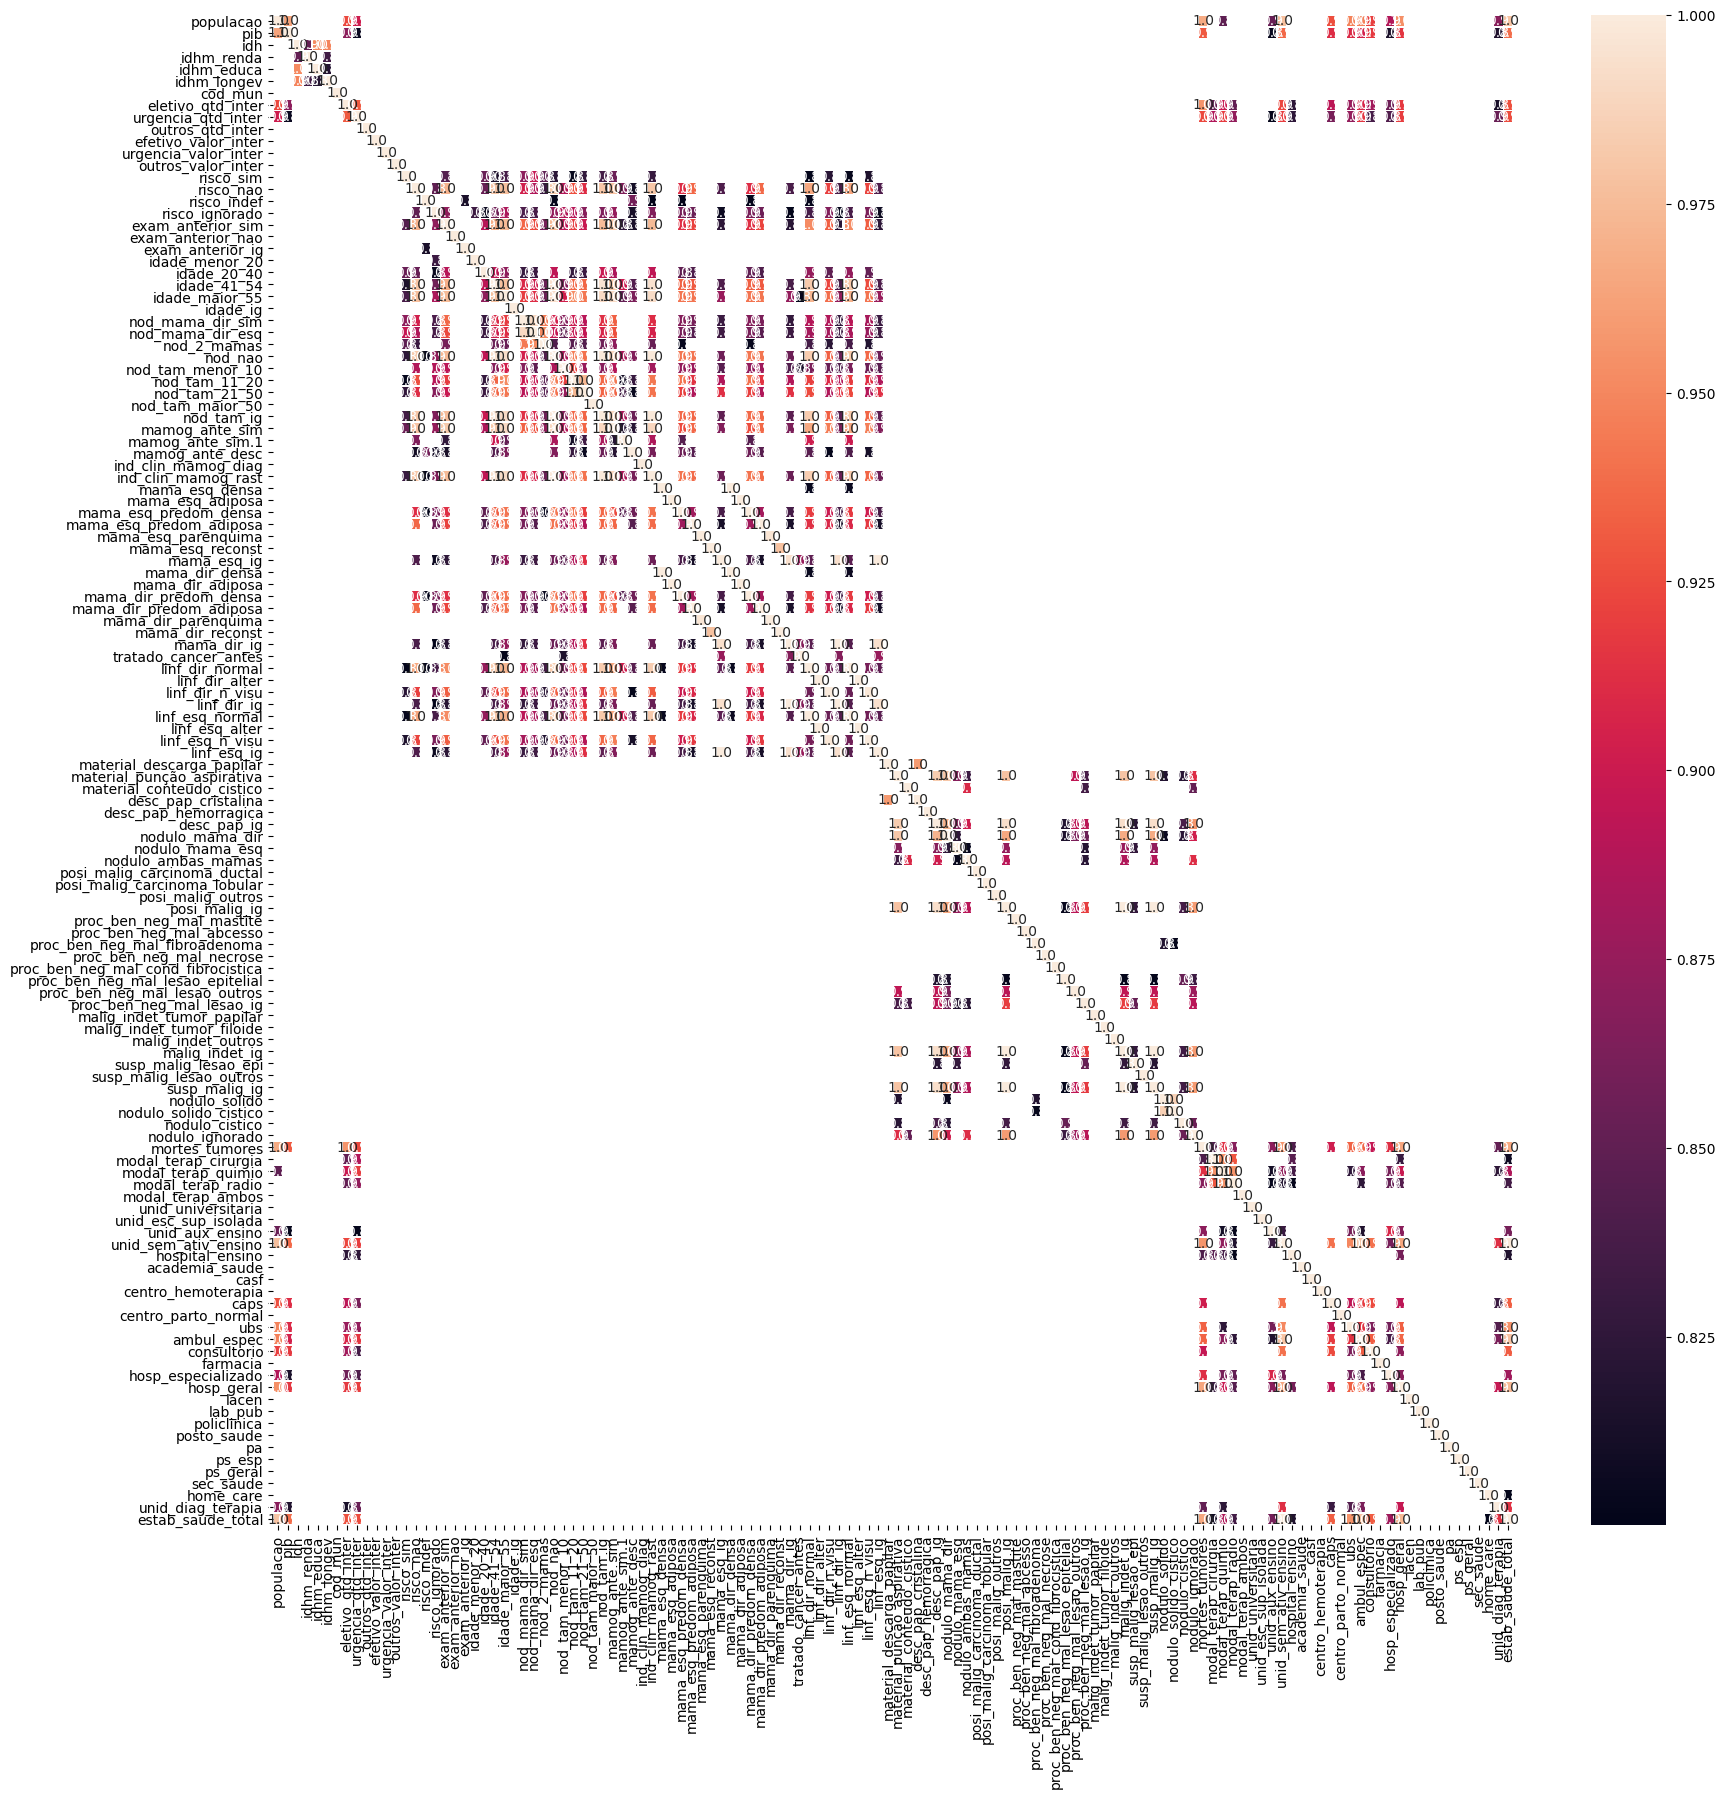

In [127]:
plt.figure(figsize=(20,20)) 
# Calculo da Matriz de Correlação
corr = df.corr()
corr1 = corr[corr>0.8]
# Visualizando Heatmap
sns.heatmap(corr1, annot=True,linewidths=.5, fmt= '.1f',
        xticklabels=corr1.columns,
        yticklabels=corr1.columns)

### 3. Escala de variaveis

In [128]:
indices = df[['cod_mun','municipio','uf']]
colunas = df.columns
colunas

Index(['municipio', 'uf', 'populacao', 'pib', 'idh', 'idhm_renda',
       'idhm_educa', 'idhm_longev', 'cod_mun', 'eletivo_qtd_inter',
       ...
       'lab_pub', 'policlinica', 'posto_saude', 'pa', 'ps_esp', 'ps_geral',
       'sec_saude', 'home_care', 'unid_diag_terapia', 'estab_saude_total'],
      dtype='object', length=128)

In [129]:
# Definindo indices
df = df.set_index(['cod_mun','municipio','uf'])
df.head()

,,,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev,eletivo_qtd_inter,urgencia_qtd_inter,outros_qtd_inter,efetivo_valor_inter,urgencia_valor_inter,outros_valor_inter,risco_sim,risco_nao,risco_indef,risco_ignorado,exam_anterior_sim,exam_anterior_nao,exam_anterior_ig,idade_menor_20,idade_20_40,idade_41_54,idade_maior_55,idade_ig,nod_mama_dir_sim,nod_mama_dir_esq,nod_2_mamas,nod_nao,nod_tam_menor_10,nod_tam_11_20,nod_tam_21_50,nod_tam_maior_50,nod_tam_ig,mamog_ante_sim,mamog_ante_sim.1,mamog_ante_desc,ind_clin_mamog_diag,ind_clin_mamog_rast,mama_esq_densa,mama_esq_adiposa,...,malig_indet_ig,susp_malig_lesao_epi,susp_malig_lesao_outros,susp_malig_ig,nodulo_solido,nodulo_solido_cistico,nodulo_cistico,nodulo_ignorado,mortes_tumores,modal_terap_cirurgia,modal_terap_quimio,modal_terap_radio,modal_terap_ambos,unid_universitaria,unid_esc_sup_isolada,unid_aux_ensino,unid_sem_ativ_ensino,hospital_ensino,academia_saude,casf,centro_hemoterapia,caps,centro_parto_normal,ubs,ambul_espec,consultorio,farmacia,hosp_especializado,hosp_geral,lacen,lab_pub,policlinica,posto_saude,pa,ps_esp,ps_geral,sec_saude,home_care,unid_diag_terapia,estab_saude_total
cod_mun,municipio,uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110001,alta floresta d'oeste,ro,22728,499306.0,0.641,0.763,0.526,0.657,94.0,1952.0,0.0,536.70,309.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,1.0,0.0,0.0,2.0,0.0,14.0,2.0,1.0,2.0,0.0,37.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,13.0,83.0
110002,ariquemes,ro,109523,2463773.0,0.702,0.806,0.600,0.716,217.0,5549.0,0.0,1010.18,743.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,353.0,0.0,0.0,1.0,7.0,2.0,0.0,71.0,66.0,10.0,3.0,8.0,93.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,7.0,73.0,357.0
110003,cabixi,ro,5188,140502.0,0.650,0.757,0.559,0.650,266.0,0.0,0.0,303.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
110004,cacoal,ro,85893,2180454.0,0.718,0.821,0.620,0.727,10573.0,2998.0,0.0,943.75,422.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.0,60.0,251.0,117.0,21.0,0.0,0.0,41.0,461.0,0.0,0.0,0.0,7.0,3.0,0.0,64.0,116.0,21.0,38.0,0.0,97.0,0.0,0.0,3.0,0.0,0.0,0.0,13.0,3.0,0.0,133.0,502.0
110005,cerejeiras,ro,16204,472179.0,0.692,0.799,0.602,0.688,2.0,1198.0,0.0,542.80,383.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,69.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,11.0,0.0,6.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,14.0,78.0


In [130]:
cols = df.columns
min_max_scaler = preprocessing.MinMaxScaler()
df_scaler = min_max_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaler)
df_scaled.columns = cols

In [131]:
#indices + scaled
df_scaled = pd.concat([indices, df_scaled], axis=1)
df_scaled.head()

,cod_mun,municipio,uf,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev,eletivo_qtd_inter,urgencia_qtd_inter,outros_qtd_inter,efetivo_valor_inter,urgencia_valor_inter,outros_valor_inter,risco_sim,risco_nao,risco_indef,risco_ignorado,exam_anterior_sim,exam_anterior_nao,exam_anterior_ig,idade_menor_20,idade_20_40,idade_41_54,idade_maior_55,idade_ig,nod_mama_dir_sim,nod_mama_dir_esq,nod_2_mamas,nod_nao,nod_tam_menor_10,nod_tam_11_20,nod_tam_21_50,nod_tam_maior_50,nod_tam_ig,mamog_ante_sim,mamog_ante_sim.1,mamog_ante_desc,ind_clin_mamog_diag,...,malig_indet_ig,susp_malig_lesao_epi,susp_malig_lesao_outros,susp_malig_ig,nodulo_solido,nodulo_solido_cistico,nodulo_cistico,nodulo_ignorado,mortes_tumores,modal_terap_cirurgia,modal_terap_quimio,modal_terap_radio,modal_terap_ambos,unid_universitaria,unid_esc_sup_isolada,unid_aux_ensino,unid_sem_ativ_ensino,hospital_ensino,academia_saude,casf,centro_hemoterapia,caps,centro_parto_normal,ubs,ambul_espec,consultorio,farmacia,hosp_especializado,hosp_geral,lacen,lab_pub,policlinica,posto_saude,pa,ps_esp,ps_geral,sec_saude,home_care,unid_diag_terapia,estab_saude_total
0,110001,alta floresta d'oeste,ro,0.001781,0.000699,0.502252,0.409910,0.516181,0.523422,0.000411,0.004429,0.0,0.012773,0.018944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000709,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.002988,0.0,0.012821,0.000000,0.000000,0.007194,0.0,0.002688,0.000257,0.000146,0.052632,0.000000,0.008184,0.0,0.0,0.000000,0.008130,0.00,0.0,0.000000,0.027027,0.000000,0.004332,0.002676
1,110002,ariquemes,ro,0.008824,0.003447,0.639640,0.603604,0.635922,0.643585,0.000948,0.012591,0.0,0.024041,0.045556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002885,0.000000,0.000000,0.000000,0.000000,0.0,0.019802,0.000000,0.012707,0.0,0.000000,0.012346,0.106061,0.007194,0.0,0.013633,0.008493,0.001457,0.078947,0.006656,0.020571,0.0,0.0,0.000969,0.000000,0.01,0.0,0.000000,0.000000,0.127273,0.024325,0.011511
2,110003,cabixi,ro,0.000358,0.000197,0.522523,0.382883,0.569579,0.509165,0.001162,0.000000,0.0,0.007214,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000202,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001404,0.0,0.012821,0.012346,0.000000,0.000000,0.0,0.000576,0.000000,0.000000,0.026316,0.000000,0.000000,0.0,0.0,0.000000,0.028455,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.001258
3,110004,cacoal,ro,0.006906,0.003051,0.675676,0.671171,0.668285,0.665988,0.046173,0.006803,0.0,0.022460,0.025929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013061,0.011774,0.036366,0.043031,0.117978,0.0,0.000000,0.019683,0.016594,0.0,0.000000,0.000000,0.106061,0.010791,0.0,0.012289,0.014927,0.003060,1.000000,0.000000,0.021455,0.0,0.0,0.002907,0.000000,0.00,0.0,0.059091,0.081081,0.000000,0.044319,0.016187
4,110005,cerejeiras,ro,0.001252,0.000661,0.617117,0.572072,0.639159,0.586558,0.000009,0.002718,0.0,0.012918,0.023493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000405,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.004321,0.002484,0.0,0.000000,0.000000,0.000000,0.003597,0.0,0.004800,0.001416,0.000000,0.157895,0.000000,0.003318,0.0,0.0,0.000000,0.008130,0.00,0.0,0.000000,0.027027,0.000000,0.004665,0.002515


In [132]:
df = df.reset_index()

### 4. Export da base para Clustering

In [133]:
df.to_csv(saida+'base_cancer_mama_socioeconomicas_normal.csv', encoding='utf-8', index=False)

In [134]:
df_scaled.to_csv(saida+'base_cancer_mama_socioeconomicas_scaled.csv', encoding='utf-8', index=False)